In [425]:
# bin/

#!pip install seaborn

import os
import sys
import pandas as pd
import random
import matplotlib.pyplot as plt
import sqlite3
from bs4 import BeautifulSoup, ResultSet
import urllib.request
import re
import glob
import warnings
from tqdm import tnrange, tqdm_notebook
from random import randint
import time 
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
import numpy as np

warnings.filterwarnings('ignore')
random.seed(666)
path = '/home/chris/HOPE/data/' # Technical debt ; hardcoded

In [536]:

# http://efm.aeaweb.org/vivisimo/cgi-bin/query-meta?v%3aproject=econlit&v%3asources=All&&v%3aproject=econlit&v%3aframe=form&form=econlit-advanced&
# https://askubuntu.com/questions/870530/how-to-install-geckodriver-in-ubuntu

# This chunk that connects to the backend is commented out, because it is code you only have to run once, initially 
# files = [f for f in os.listdir(path) if os.path.isfile(f)]
# data =  pd.DataFrame([])
# for file in tqdm_notebook(files):
#    df = pd.read_table(file)
#    df = df.iloc[1:,:]
#    if len(df.columns) > 1:
#        continue
#    df.columns = ["metadata"]
#    data = data.append(df)
    #path = '/home/chris/HOPE/'
#all_files = glob.glob(path + "/*.csv")
#li = []
#df = pd.DataFrame(df.iloc[:,-1])for filename in all_files:
#    df = pd.read_csv#(filename, index_col=None, header=0)
#    li.append(df)
#df = pd.concat(li, axis=0, ignore_index=True)
#

#def to_csv():

#    cursor = db.cursor()
#    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#    tables = cursor.fetchall()
#    for table_name in tqdm_notebook(tables):
#        table_name = table_name[0]
#        table = pd.read_sql_query("SELECT * from %s" % table_name, db)
#        table.to_csv(table_name + '.csv', index_label='index')
#    cursor.close()
#    db.close()
#
#to_csv()


# After running it once, it makes more practical sense to save every "working file" as a csv
# And then turn these csv files into dataframes
os.chdir("/home/chris/HOPE/old junk/old_db/") # HARDCODED WORKAROUND
Article =          pd.read_csv("Article.csv")
AuthorAlias =      pd.read_csv("AuthorAlias.csv")
JEL =              pd.read_csv("JEL.csv")
Children =         pd.read_csv("Children.csv")
Nber =             pd.read_csv("Nber.csv")
NBERCorr =         pd.read_csv("NBERCorr.csv")
NBERStat =         pd.read_csv("NBERStat.csv")
sqlite_sequence =  pd.read_csv("sqlite_sequence.csv")
Inst =             pd.read_csv("Inst.csv")
sqlite_stat4 =     pd.read_csv("sqlite_stat4.csv")
InstCorr =         pd.read_csv("InstCorr.csv")
InstAlias =        pd.read_csv("InstAlias.csv")
JournalName =      pd.read_csv("JournalName.csv")
ReadStat =         pd.read_csv("ReadStat.csv")
sqlite_stat1 =     pd.read_csv("sqlite_stat1.csv")
AuthorCorr =       pd.read_csv("AuthorCorr.csv")
DOICorr =          pd.read_csv("DOICorr.csv")
Author =           pd.read_csv("Author.csv")
EditorBoard =      pd.read_csv("EditorBoard.csv")
os.chdir('/home/chris/HOPE/data/') # Hardcoded file path! 


In [ ]:

files = [f for f in os.listdir(path) if os.path.isfile(f)]
data =  pd.DataFrame([])
for file in tqdm_notebook(files):
    df = pd.read_table(file)
    df = df.iloc[1:,:]
    if len(df.columns) > 1:
        continue
    df.columns = ["metadata"]
    data = data.append(df)
# Make an identifying key for each idividual article
data["idx"] = ""
data.columns = ["metadata", "idx"]
counter = Article.ArticleID.max() + 1
for k in tqdm_notebook(range(0, len(data))):
    string = data.iloc[k,0]
    if string[:2] == "PT":
        data.iloc[k,-1] = int(counter)
        counter = counter +1 
data = data.replace(r'^\s*$', np.nan, regex=True)
data["idx"] = data["idx"].ffill()

# Keep all rows that ARENT already in existing .db
data['category'] = data['metadata'].str[:2]
WOS = data[data["category"] == "UT"] 
WOS["WOS"]= WOS['metadata'].str[3:]
WOS_set = set(WOS.WOS)
DOI = data[data["category"] == "DI"] 
DOI["DOI"]= DOI['metadata'].str[3:]
DOI_set = set(DOI.DOI)
new_DOI = list(DOI_set) + list(WOS_set)
master_DOI = list(set(DOICorr.DOI))
new = [x for x in new_DOI if not x in master_DOI]
DOI = DOI[["idx", "DOI"]]
WOS = WOS[["idx", "WOS"]]
WOS.columns = ["idx","DOI"]
df = DOI.append(WOS)
df = df[df['DOI'].isin(new)]
keep = list(set(df.idx))
df = data[data['idx'].isin(keep)]

# Reindex 
# WARNING: THIS TAKES 20 HOURS FOR SOME REASON
df["idx"] = ""
counter = Article.ArticleID.max() + 1
for k in tqdm_notebook(range(0, len(df))):
    string = df.iloc[k,0]
    if string[:2] == "PT":
        df.iloc[k,-2] = int(counter)
        counter = counter +1 
df = df.replace(r'^\s*$', np.nan, regex=True)
df["idx"] = df["idx"].ffill()
df.to_csv("clean_data_3.csv")

# http://efm.aeaweb.org/vivisimo/cgi-bin/query-meta?v%3aproject=econlit&v%3asources=All&&v%3aproject=econlit&v%3aframe=form&form=econlit-advanced&
# https://askubuntu.com/questions/870530/how-to-install-geckodriver-in-ubuntu
### Cheating/Workaround
#driver = webdriver.Firefox()
#time.sleep(6) 
#driver.get('https://libguides.liverpool.ac.uk/az.php?a=w')
#time.sleep(6) 
#driver.find_element_by_xpath(u'/html/body/div[2]/div/div[4]/section[2]/div/div[1]/div[3]/div/div[2]/div[2]/div[1]/a').click()
#time.sleep(6) 
#driver.find_element_by_id("value(input1)").send_keys("SO = ECONOMIC JOURNAL OR SO = ECONOMETRICA OR SO = AMERICAN ECONOMIC REVIEW OR SO = JOURNAL OF POLITICAL ECONOMY OR SO = QUARTERLY JOURNAL OF ECONOMICS OR SO = REVIEW OF ECONOMIC STUDIES")
#driver.find_element_by_id("search-button").click()
#driver.find_element_by_xpath("username").send_keys("ehengel")
#driver.find_element_by_name("j_username").send_keys("adoDEM88")
#query(IS = "1468-0297") # EJ
#query(IS = "1468-0262") # ECA
#query(IS = "1944-7981") # AER
#query(IS = "1537-534X") # JPE
#query(IS = "1531-4650") # QJE
#query(IS = "1467-937X") # RES
#  SO = ECONOMIC JOURNAL OR SO = ECONOMETRICA OR SO = AMERICAN ECONOMIC REVIEW OR SO = JOURNAL OF POLITICAL ECONOMY OR SO = QUARTERLY JOURNAL OF ECONOMICS OR SO = REVIEW OF ECONOMIC STUDIES
#driver.switch_to.window(driver.window_handles[1])
#driver.find_element_by_link_text("Advanced Search").click()
#driver.find_element_by_id("value(input1)").send_keys("SO = ECONOMIC JOURNAL OR SO = ECONOMETRICA OR SO = AMERICAN ECONOMIC REVIEW OR SO = JOURNAL OF POLITICAL ECONOMY OR SO = QUARTERLY JOURNAL OF ECONOMICS OR SO = REVIEW OF ECONOMIC STUDIES")
#driver.find_element_by_id("search-button").click()
#time.sleep(6) 
#driver.switch_to.window(driver.window_handles[1])
#driver.find_element_by_xpath("markFrom").send_keys("11")
#driver.find_element_by_id("value(input1)").send_keys("IS = " + IS)

In [427]:
# Load Data from checkpoint
os.chdir("/home/chris/HOPE/data") # HARDCODED 
df = pd.read_csv("clean_data_3.csv")
df = df.drop(columns = ["Unnamed: 0"]) 

# Pick out individual authors
df['af_flag'] = pd.np.where(df.category == "AF", "AF",pd.np.where(df.category == "TI", "TI", pd.np.where(df.category == "AU", "AU", "")))
df = df.replace(r'^\s*$', np.nan, regex=True)
df["af_flag"] = df["af_flag"].ffill()
df = df.replace(r'^\s*$', np.nan, regex=True)
df["idx"] = df["idx"].ffill()
#df = df.iloc[1:1000,:]

# Initialize loop parameters
articles = pd.DataFrame(set(df.idx))
article_id_counter = Article.ArticleID.max() +1
article_index_counter = Article.index.max() +1

# Initialize empty df's to be filled up in loop
new_authors = pd.DataFrame([])
new_articles = pd.DataFrame([])

for i in tqdm_notebook(range(0, len(articles))):
    
    # Initialize data
    article = pd.DataFrame([])
    data = df[df["idx"] == articles.iloc[i,0]]
    data['category'] = data['category'].astype(str)
    
    # Initialize counting/looping mechanism 
    article["index"] = pd.Series(article_index_counter)
    article["ArticleID"] = pd.Series(article_id_counter)
    
    # Journal name 
    journal = data[data["category"] == "SO"]
    journal = str(journal.iloc[0,0])
    journal = journal[3:]
    
    # Dealing with special issues 
    #special_issue = data[data["category"] == "SI"]
    #if len(special_issue) > 0:
    #    #print("Caution - Special Issue - " + str(special_issue))
    #    special_issue = str(special_issue.iloc[0,0])
    
    # Manual workaround for naming conventions 
    if journal == "AMERICAN ECONOMIC REVIEW":
        journal = "AER"
    if journal == "ECONOMIC JOURNAL":
        journal = "EJ"
    if journal == "JOURNAL OF POLITICAL ECONOMY":
        journal = "JPE"
    if journal == "ECONOMETRICA":
        journal = "ECA"
    if journal == "QUARTERLY JOURNAL OF ECONOMICS":
        journal = "QJE"
    if journal == "REVIEW OF ECONOMIC STUDIES":
        journal = "RES"
    article["Journal"] = journal
    
    # Publication Date
    pubdate = data[data["category"] == "PY"]
    if len(pubdate) > 0:
        pubdate = str(pubdate.iloc[0,0])
        pubdate = pubdate[3:]
    else:
        pubdate = "MISSING"
    article["PubDate"] = pubdate
    
    # Publication Dates
    title = data[data["category"] == "TI"]
    title = str(title.iloc[0,0])
    title = title[3:]
    article["Title"] = title

    # Authors
    authors = data[data["af_flag"] == "AF"]
    authors = pd.DataFrame(authors['metadata'].str[3:])
    authors["ArticleID"] = article_id_counter
    authors["index"] = pd.Series(article_index_counter)
    
    # Abstracts
    article["Abstract"] = ""
    Abstract = data[data["category"] == "AB"] # naming conventions technical debt 
    if len(Abstract) < 1:
        article["Abstract"] = "MISSING"
    else: 
        Abstract = str(Abstract.iloc[0,0])
        Abstract = Abstract[3:]
        article["Abstract"] = Abstract
    
    # Harcode The next several columns
    article["Language"] = "English"
    article["Received"] = "MISSING"
    article["Accepted"] = "MISSING"

    # Volume 
    article["Volume"] = ""
    Volume = data[data["category"] == "VL"] # naming conventions technical debt 
    if len(Volume) < 1:
        article["Volume"] = "MISSING"
    else: 
        Volume = str(Volume.iloc[0,0])
        Volume = Volume[3:]
        article["Volume"] = Volume

    # Issue
    article["Issue"] = ""
    Issue = data[data["category"] == "IS"] # naming conventions technical debt 
   # print(Issue)
    if len(Issue) < 1:
        article["Issue"] = "MISSING"
    else: 
        Issue = str(Issue.iloc[0,0])
        Issue = Issue[3:]
        article["Issue"] = Issue
        
    # Final few columns
    article["Part"] = "MISSING"
    
    # First Page 
    article["FirstPage"] = ""
    FirstPage = data[data["category"] == "BP"] # naming conventions technical debt 
    if len(FirstPage) < 1:
        article["FirstPage"] = "MISSING"
    else: 
        FirstPage = str(FirstPage.iloc[0,0])
        FirstPage = FirstPage[3:]
        article["FirstPage"] = FirstPage
        
    # Last Page 
    article["LastPage "] = ""
    LastPage = data[data["category"] == "EP"] # naming conventions technical debt 
    if len(LastPage) < 1:
        article["LastPage"] = "MISSING"
    else: 
        LastPage = str(LastPage.iloc[0,0])
        LastPage = LastPage[3:]
        article["LastPage"] = LastPage
    
    # Comments
    article["Comments"] = "MISSING"
    
    # Citations
    article["CiteCount "] = ""
    CiteCount = data[data["category"] == "NR"] # naming conventions technical debt 
    if len(LastPage) < 1:
        article["CiteCount"] = "MISSING"
    else: 
        CiteCount = str(CiteCount.iloc[0,0])
        CiteCount = CiteCount[3:]
        article["CiteCount"] = CiteCount        
    
    # Note
    article["Note"] = "MISSING"

    # update counter mechanism 
    article_id_counter += 1
    article_index_counter += 1 # redundant technical debt 

    # Append in loop
    new_articles = new_articles.append(article)
    new_authors = new_authors.append(authors)
    
    
# This next chunk of dense data manipulation is wrangling all the output 
# It returns tables that are formatted identical to those found in "read.db"
# (In the next cell, we will proceed to append these new dataframes onto read.db!)
for i in tqdm_notebook(range(0, len(new_authors))):
    string = new_authors.iloc[i,0]
    string =  string.title()
    new_authors.iloc[i,0] = string
new_authors['metadata'] = new_authors['metadata'].astype('str') #where the max length is set at 80 bytes,
new_authors["last name"] = " "
new_authors["first name"] = " "
for i in tqdm_notebook(range(0, len(new_authors))):
    string = new_authors.iloc[i,0]
    last = string.split(",")[0]
    try:
        first = string.split(",")[1]
    except IndexError:
        first = "MISSING"
    new_authors.iloc[i,-1] = first
    new_authors.iloc[i,-2] = last
new_authors = new_authors.reset_index(drop=True)
cols = [-3, -6]
new_articles = new_articles.drop(new_articles.columns[[-3,-6]], axis = 1)
new_authors["AuthorName"] = new_authors["first name"] + " " + new_authors["last name"] 
master_key = pd.read_csv("key.csv", header = None)
master_key.columns = ["metadata", "clean name", "confirmed name", "Sex"]
df = new_authors.merge(master_key, on = "metadata", how = "outer")
df = df[["confirmed name", "Sex"]] 
df.columns = ["AuthorName", "Sex"]
df["NativeLanguage"] = ""
df["PhDYear"] = ""
df["Note"] = ""
df = df.drop_duplicates()
redundant = pd.DataFrame(set(df.AuthorName).intersection(set(Author.AuthorName)))
redundant.columns=["AuthorName"]
df = df[~df['AuthorName'].isin(set(redundant.AuthorName))]
df = df.dropna()
df.to_csv("new_authors_temporary_3.csv") # Naming conventions :) 
new_articles.to_csv("new_articles_temporary_3.csv") # Naming conventions :) 


In [541]:
df = pd.read_csv("new_authors_temporary_3.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.insert(0,'AuthorID','')
df['AuthorID'] = range(0 + max(Author.AuthorID) + 1, len(df) + max(Author.AuthorID)+1)

# Update Article Table by Dynamically Inserting into a Database

# Update Author Table by Dynamically Inserting into a Database
for row in tqdm_notebook(new_articles.iterrows()):
    
    row = pd.DataFrame(row)
    row = pd.DataFrame(row.iloc[1,0])
    ArticleID = row.iloc[0,0]
    Journal = row.iloc[1,0]
    PubDate = row.iloc[2,0]
    Title = row.iloc[3,0]
    Abstract = row.iloc[4,0]
    Language = row.iloc[5,0]
    Received = row.iloc[6,0]
    Accepted = row.iloc[7,0]
    Volume = row.iloc[8,0]
    Issue = row.iloc[9,0]
    Part = row.iloc[10,0]
    FirstPage = row.iloc[11,0]
    LastPage = row.iloc[12,0]
    Comments = row.iloc[13,0]
    CiteCount = row.iloc[14,0]
    Note = row.iloc[15,0]
    
    # create a database connection
    try:
        conn = create_connection("read.db")
    except Error as e:
        print(e)

    cur = conn.cursor()
    cur.execute("INSERT INTO AuthoArticler(AuthorID,AuthorName,Sex,NativeLanguage,PhDYear, Note) VALUES (?, ?, ?, ?, ?, ?)",
          (AuthorID, AuthorName, Sex, NativeLanguage, PhDYear, Note))
  
    conn.commit() 
# Update Author Table by Dynamically Inserting into a Database
for row in tqdm_notebook(df.iterrows()):
    
    row = pd.DataFrame(row)
    row = pd.DataFrame(row.iloc[1,0])
    AuthorID = row.iloc[0,0]
    AuthorName = row.iloc[1,0]
    Sex = row.iloc[2,0]
    NativeLanguage = "MISSING"
    PhDYear = "MISSING"
    Note = "MISSING"
    
    # create a database connection
    try:
        conn = create_connection("read.db")
    except Error as e:
        print(e)

    cur = conn.cursor()
    cur.execute("INSERT INTO Author(AuthorID,AuthorName,Sex,NativeLanguage,PhDYear, Note) VALUES (?, ?, ?, ?, ?, ?)",
          (AuthorID, AuthorName, Sex, NativeLanguage, PhDYear, Note))
  
    conn.commit() 



In [542]:

def verify_update():
    
    # create a database connection
    try:
        conn = create_connection("read.db")
    except Error as e:
        print(e)
        
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM Article;")
    tables = cursor.fetchall()
    tables = pd.DataFrame(tables)
    cursor.close()
    
    return(tables)
    
verify_update()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,ECA,1998-11-01,Efficient Intra-Household Allocations: A Gener...,The neoclassical theory of demand applies to i...,English,1994-05-01,1997-08-01,66,6,1,1241,1278,None,300.0,None
1,2,ECA,1998-11-01,The Noah's Ark Problem,This paper is about the economic theory of bio...,English,1996-07-01,1997-06-01,66,6,1,1279,1298,None,189.0,None
2,3,ECA,1998-11-01,New Tools for Understanding Spurious Regressions,Some new tools for analyzing spurious regressi...,English,1996-07-01,1997-11-01,66,6,1,1299,1325,None,62.0,None
3,4,ECA,1998-11-01,Bootstrap Methods for Median Regression Models,The least-absolute-deviations (LAD) estimator ...,English,1996-09-01,1997-10-01,66,6,1,1327,1351,None,58.0,None
4,5,ECA,1998-11-01,Efficiency and Voluntary Implementation in Mar...,"We examine a simple bargaining setting, where ...",English,1996-11-01,1997-10-01,66,6,1,1353,1388,None,11.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,11720,RES,1979-10-01,The Demand for General and Specific Education ...,,English,1977-08-01,1978-10-01,46,4,None,695,705,None,9.0,None
11691,11721,RES,1979-10-01,"Impatience, Information and Risk Taking in a G...",,English,1977-08-01,1978-10-01,46,4,None,707,718,None,4.0,None
11692,11722,RES,1979-10-01,The Estimation of a Vintage Model of Productio...,,English,1976-10-01,1978-10-01,46,4,None,719,736,None,11.0,None
11693,11723,RES,1979-10-01,A Theorem on Aggregation across Consumers in N...,,English,1978-02-01,1979-01-01,46,4,None,737,740,None,1.0,None


In [540]:

def verify_update():
    
    # create a database connection
    try:
        conn = create_connection("read.db")
    except Error as e:
        print(e)
        
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM Author;")
    tables = cursor.fetchall()
    tables = pd.DataFrame(tables)
    cursor.close()
    
    return(tables)
    
verify_update()

,0,1,2,3,4,5
0,1,A. Abigail Payne,Female,None,NaN,None
1,2,A. Andrew John,Male,English,NaN,None
2,3,A. Belloni,Male,None,NaN,None
3,4,A. Colin Cameron,Male,English,NaN,None
4,5,A. Joshua Strickland,Male,English,NaN,None
...,...,...,...,...,...,...
8205,9615,Edward Tower,Male,None,NaN,None
8206,9616,Andrew Feltenstein,Male,None,NaN,None
8207,9617,Steven Braithwait,Male,None,NaN,None
8208,9618,John S. Pettengill,Male,None,NaN,None


In [ ]:
# Check for duplicates in article names and 

In [ ]:

# Manual cleaning 

# manual_clean = new_authors.merge(new_articles, on = "ArticleID")
#manual_clean = manual_clean[["metadata","ArticleID","Journal", "PubDate", "Title"]]
#manual_clean = manual_clean.drop(columns = ["ArticleID"])
#manual_clean = manual_clean.drop_duplicates(subset="metadata", keep='first', inplace=False)
#master_key = pd.read_csv("key.csv", header=None)
#master_key.columns = ["metadata", "clean name", "confirmed name", "Sex"]
#manual_clean= manual_clean.merge(master_key, on = "metadata", how = "outer")
#manual_clean = manual_clean.replace(np.nan, '', regex=True)
#manual_clean = manual_clean[manual_clean["Sex"] != "Male" ]
#manual_clean = manual_clean[manual_clean["Sex"] != "Female" ] # technical debt!
#manual_clean = new_authors.merge(new_articles, on = "ArticleID")
#manual_clean = manual_clean[["metadata","ArticleID","Journal", "PubDate", "Title"]]
#manual_clean = manual_clean.drop(columns = ["ArticleID"])
#manual_clean = manual_clean.drop_duplicates(subset="metadata", keep='first', inplace=False)
#master_key = pd.read_csv("masterkey.csv", header=None)
#master_key.columns = ["metadata", "clean name", "confirmed name", "Sex"]
#manual_clean= manual_clean.merge(master_key, on = "metadata", how = "outer")
##manual_clean = manual_clean.replace(np.nan, '', regex=True)
#manual_clean = manual_clean[manual_clean["Sex"] != "Male" ]
#manual_clean = manual_clean[manual_clean["Sex"] != "Female" ]
#for i in tqdm_notebook(range(0, len(manual_clean))):
#    string = manual_clean.iloc[i,0]
#    string =  string.title()
#    manual_clean.iloc[i,0] = string
#manual_clean['metadata'] = manual_clean['metadata'].astype('str') #where the max length is set at 80 bytes,
#manual_clean["last name"] = " "
#manual_clean["first name"] = " "
#for i in tqdm_notebook(range(0, len(manual_clean))):
#    string = manual_clean.iloc[i,0]
#    last = string.split(",")[0]
#    try:
#        first = string.split(",")[1]
#    except IndexError:
#        first = "MISSING"
#    manual_clean.iloc[i,-1] = first
#    manual_clean.iloc[i,-2] = last
#manual_clean = manual_clean.reset_index(drop=True)
#manual_clean["clean name"] = manual_clean["first name"]  + " " + manual_clean["last name"] 
#manual_clean["first name"] = manual_clean["first name"].str.replace(' ', '') # tech debt!
#manual_clean["first name"] = manual_clean["first name"].str.replace(' ', '')
#manual_clean["first name"] = manual_clean["first name"].str.replace(' ', '')
#manual_clean["first name"] = manual_clean['first name'].astype(str).str[0]
#manual_clean["name"] = manual_clean["first name"] + " "+ manual_clean["last name"] 
#master_key["first name"] = master_key['clean name'].astype(str).str[0]
#master_key['last name'] = master_key['clean name'].str.split().str[-1]#master_key["last name"] = master_key["last name"][0]\
#master_key["name"] = master_key["first name"] + " "+ master_key["last name"] 
#Author["first name"] = Author['AuthorName'].astype(str).str[0]
#Author['last name'] = Author['AuthorName'].str.split().str[-1]#master_key["last name"] = master_key["last name"][0]\
#Author["name"] = Author["first name"] + " " + Author["last name"] 
#manual_clean["first name"] = manual_clean['first name'].astype(str).str[1]
#manual_clean["name"] = manual_clean["first name"] + " " + manual_clean["last name"] 
#manual_clean_2 = manual_clean.merge(Author, on = ["name" ], )
#manual_clean_2 = manual_clean_2.sort_values(by = "clean name")manual_clean_2.to_csv("manual_clean_2")
#Author = Author[["AuthorName","Sex"]]
#Author["last name"] = Author["AuthorName"].str.split().str[-1]
#Author["middle name"] = Author["AuthorName"].str.split().str[1]
#Author["first name"] = Author["AuthorName"].str.split().str[0]
#old_surnames = set(Author["last name"])
#matches = pd.DataFrame([])
#for i in tqdm_notebook(range(0, len(new_authors))):
#    
#    last = new_authors.iloc[i,1]
#    first = str(new_authors.iloc[i,-1])
#    first = first.replace(' ', '')
#    first = first.replace(' ', '')
#    first_letter = first[0] # terrible naming conventions (technical debt!)
#    
#    match = Author[Author["last name"] == last]
#    if len(match)>1:
#        first_name = first[:1]
#        match["first name"] = match["first name"].astype(str).str[0]
#        match = match[match["first name"] == first_letter]
#    if len(match == 1):
#        match = match.iloc[:,0:2]
#        
#    if len(match)>1:
#        match = pd.DataFrame([" ", " "])
#    if len(match)<1:
#3        match = pd.DataFrame([" ", " "])
#
#    match["idx"] = i
#    matches = matches.append(match)
#matches = matches[["idx", "AuthorName", "Sex"]]
#matches = matches[matches['AuthorName'].notnull()]
#old_articles = Article[["index", "ArticleID", "Journal", "Title","PubDate"]]
#df = old_articles.append(new_articles)
#df.to_csv("df.csv")
#new_authors.to_csv("authors_new.csv") # backwards naming convention
#new_authors["idx"] = new_authors.index
#new_authors = new_authors.merge(matches,on ="idx", how = "outer")
#new_authors["Name"] = new_authors["first name"] + " " + new_authors["last name"]
#new_authors = new_authors[["metadata","Name","AuthorName", "Sex"]]
#new_authors = new_authors.dropna(subset=['metadata'])
#new_authors.columns = ["metadata", "Clean Name", "Possible Match", "Possible Sex"]


# Let's see what the data looks like. 
#manual_clean  = manual_clean.sort_values(by = "clean name")
#print(manual_clean)
# Print to .csv file so that you can manually tag the gender of each author
#manual_clean_2.to_csv("manual_clean_5.csv")

In [336]:
def ArticleID_query(ID):
    
    data = new_articles[new_articles["ArticleID"] == ID]
    data1 = new_authors[new_authors["ArticleID"] == ID] 

    print("ArticleID: " + str(data.iloc[0,1]))
    print("Journal: " + str(data.iloc[0,2]))
    print("Published in year: " + str(data.iloc[0,3]))
    print("Title: " + str(data.iloc[0,4]))
    print("Volume: " + str(data.iloc[0,9]))
    print("Issue: " + str(data.iloc[0,10]))
    print("There are " + str(len(data1)) + " co-authors on this paper:" )
    print(set(data1.metadata))

#def Author_query(First, Last):
    
ArticleID_query(18721.0)


ArticleID: 18721
Journal: AER
Published in year: 2017
Title: Gender Differences in Accepting and Receiving Requests for Tasks with
Volume: 107
Issue: 3
There are 4 co-authors on this paper:
{'Weingart, Laurie', 'Vesterlund, Lise', 'Babcock, Linda', 'Recalde, Maria P.'}


In [352]:
new_articles.columns

Index(['index', 'ArticleID', 'Journal', 'PubDate', 'Title', 'Abstract',
       'Language', 'Received', 'Accepted', 'Volume', 'Issue', 'Part',
       'FirstPage', 'LastPage', 'Comments', 'CiteCount', 'Note'],
      dtype='object')

In [353]:
Article.columns

Index(['index', 'ArticleID', 'Journal', 'PubDate', 'Title', 'Abstract',
       'Language', 'Received', 'Accepted', 'Volume', 'Issue', 'Part',
       'FirstPage', 'LastPage', 'Comments', 'CiteCount', 'Note'],
      dtype='object')

In [354]:
new_articles

,index,ArticleID,Journal,PubDate,Title,Abstract,Language,Received,Accepted,Volume,Issue,Part,FirstPage,LastPage,Comments,CiteCount,Note
0,11695,11725,EJ,1957,THE CONVEXITY OF THE PRODUCTION POSSIBILITY FU...,MISSING,English,MISSING,MISSING,67,268,MISSING,748,750,MISSING,1,MISSING
0,11696,11726,JPE,1957,"PERFECT COMPETITION, HISTORICALLY CONTEMPLATED",MISSING,English,MISSING,MISSING,65,1,MISSING,1,17,MISSING,20,MISSING
0,11697,11727,JPE,1957,THE EFFECTIVENESS OF MONETARY-POLICY RECENT BR...,MISSING,English,MISSING,MISSING,65,1,MISSING,18,39,MISSING,30,MISSING
0,11698,11728,JPE,1957,CONVEX INDIFFERENCE CURVES AND DIMINISHING MAR...,MISSING,English,MISSING,MISSING,65,1,MISSING,40,50,MISSING,1,MISSING
0,11699,11729,JPE,1957,ON MEASURING ECONOMIC-GROWTH,MISSING,English,MISSING,MISSING,65,1,MISSING,51,63,MISSING,8,MISSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,28879,28909,EJ,2009,BIDDING BEHAVIOUR IN MULTI-UNIT AUCTIONS - AN ...,We present laboratory experiments of five diff...,English,MISSING,MISSING,119,537,MISSING,855,882,MISSING,35,MISSING
0,28880,28910,EJ,2009,VOLUNTARY PROVISION OF PUBLIC GOODS FOR BADS: ...,This article examines voluntary provision of a...,English,MISSING,MISSING,119,537,MISSING,883,899,MISSING,19,MISSING
0,28881,28911,EJ,2009,"CAUSES, CONSEQUENCES, AND CURES OF MYOPIC LOSS...","We use an experiment to examine the causes, co...",English,MISSING,MISSING,119,537,MISSING,900,916,MISSING,24,MISSING
0,28882,28912,EJ,2009,LINKS AND ARCHITECTURE IN VILLAGE NETWORKS,In this article we test the implications of a ...,English,MISSING,MISSING,119,537,MISSING,917,949,MISSING,32,MISSING


In [ ]:
# Check for Dupicates (extra safety!)

 #set(a).intersection(b)

In [329]:
print(new_articles.columns)

Index(['index', 'ArticleID', 'Journal', 'PubDate', 'Title', 'Abstract',
       'Language', 'Received', 'Accepted', 'Volume', 'Issue'],
      dtype='object')


In [330]:
print(Article.columns)


Index(['index', 'ArticleID', 'Journal', 'PubDate', 'Title', 'Abstract',
       'Language', 'Received', 'Accepted', 'Volume', 'Issue', 'Part',
       'FirstPage', 'LastPage', 'Comments', 'CiteCount', 'Note'],
      dtype='object')


In [ ]:
# growth in page length 

In [ ]:
# Citations 


No handles with labels found to put in legend.


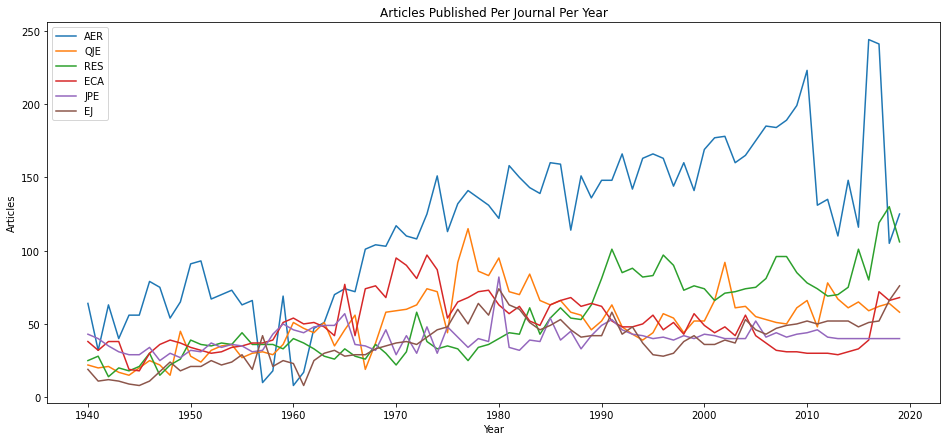

{'JPE', 'AER', 'ECA', 'RES', 'QJE', 'EJ'}


In [53]:
os.chdir("/home/chris/HOPE/data") # HARDCODED 
df = pd.read_csv("df.csv")
df = df.drop(columns = ["Unnamed: 0"])
df["PubDate"] = pd.to_numeric(df['PubDate'].astype(str).str[:4])
root_df = df # technical debt 
df = df.groupby(['Journal',"PubDate"]).count()
df["journal"] = df.index.get_level_values(0)
df["PubDate"] = df.index.get_level_values(1)
df.index = range(0, len(df))
df = df[df["PubDate"] < 2020] # Why?
df = df[~df['journal'].str.contains("P&P")]
fig, ax = plt.subplots(figsize=(16,7))
ax.set_title('Articles Published Per Journal Per Year')

for unq_value in df['journal'].unique():
    mask = df['journal'] == unq_value
    df_subset = df[mask]
    plt.plot(df_subset['PubDate'], df_subset['ArticleID'])
ax.set_xlabel('Year')
ax.set_ylabel('Articles')
ax.legend(loc='upper left')
ax.legend(['AER', 'QJE', 'RES', 'ECA', 'JPE', 'EJ'])
plt.show()
print(set(df.journal))

In [79]:
df = root_df
clean = pd.read_csv("manually_clean.csv",header=None)
clean.columns = ["a","b","c","d","e","f", "g"] # terrible naming convention (technical debt!)
clean = clean[["b","e"]]
clean = clean[clean['e'].isin(["Male","Female"])]
clean.columns = ["metadata", "ArticleID"] # workaround
new_authors = pd.read_csv("authors_new.csv") # naming convention (technical debt!)
new_authors = new_authors[["metadata", "ArticleID"]]
new_authors = new_authors.merge( clean, on = "metadata")
new_authors.columns = ["Name", "ArticleID", "sex"]
# Create new_author_corr

journal_gender_stats = pd.DataFrame([])
for journal in tqdm_notebook(set(df.Journal)):
    data = df[df["Journal"] == journal]
    article_IDs = set(data["ArticleID"])
    this_journal = pd.DataFrame([])    
    for ID in tqdm_notebook(article_IDs):
        if ID in set(new_authors.ArticleID): # Can these 2 if statements be collapsed into 1?
            data = new_authors[new_authors["ArticleID"] == ID]
            data = data[["ArticleID", "sex"]]
            data.columns = ["ArticleID", "Sex"]
            this_journal = this_journal.append(data)
        if ID in set(AuthorCorr.ArticleID):
            data = AuthorCorr[AuthorCorr["ArticleID"] == ID]
            data = data.merge(AuthorAlias, on = "AuthorID")
            data = data.merge(Author, on = "AuthorName")
            data = data[["ArticleID","Sex"]]
            this_journal = this_journal.append(data)
    this_journal["Journal"] = journal
    journal_gender_stats = journal_gender_stats.append(this_journal)



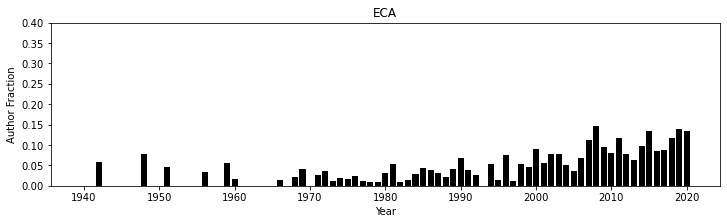

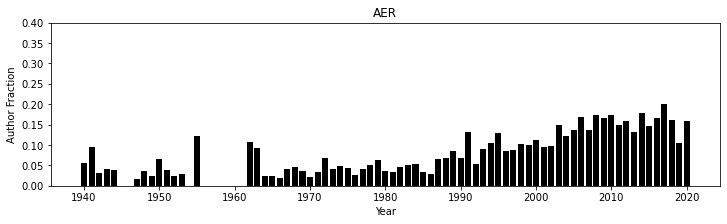

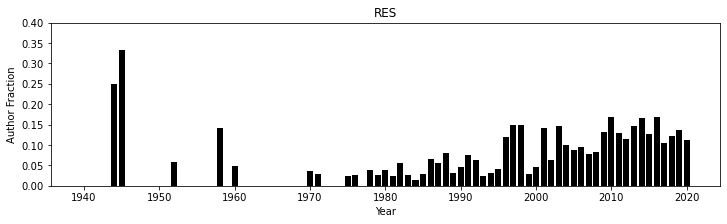

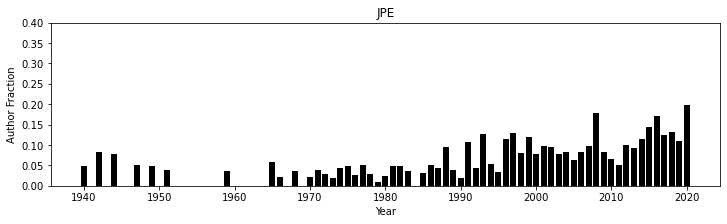

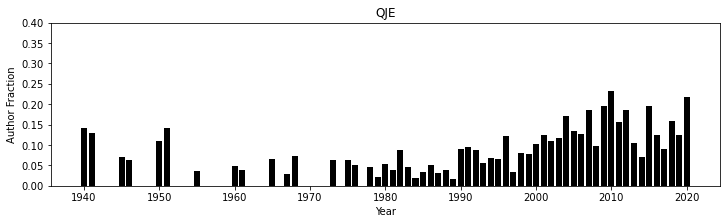

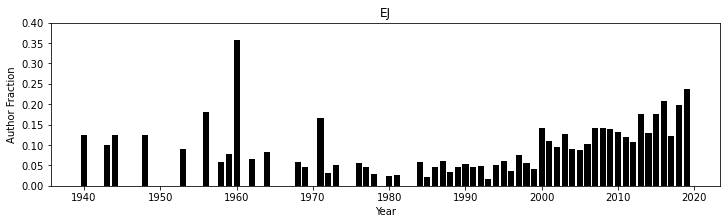

In [157]:
journal_gender_stats = journal_gender_stats[journal_gender_stats["Journal"] != "P&P"]
data = journal_gender_stats.merge(df, on="ArticleID",  how='left')
data = data[["PubDate","Journal_y","Sex"]]
data.columns = ["PubDate","Journal", "Sex"]

for journal in tqdm_notebook(set(data.Journal)):
    
    dat = data[data["Journal"] == journal]
    years = pd.DataFrame([])
    for year in set(dat.PubDate):
        da = dat[dat["PubDate"] == year]
        male = pd.DataFrame(pd.Series(len(da[da["Sex"] == "Male"])))
        female = pd.DataFrame(pd.Series(len(da[da["Sex"] == "Female"])))
        summary = male.append(female)
        summary = summary.T
        summary.columns = ["Male", "Female"]
        summary["Year"] = year
        years = years.append(summary)
    years["Ratio"] = years.Female/(years.Male + years.Female)
    
    fig, ax = plt.subplots(figsize=(12,3))
    
    ax.set_title(str(journal))
    ax.set_xlabel('Year')
    ax.set_ylabel('Author Fraction')
    plt.bar(x= years.Year, height=years['Ratio']  , color = "black")
    plt.ylim(0, 0.4)     # set the ylim to bottom, top

    plt.show()


In [172]:
# Name fuzzy matching cell

# investigate and drop speciual issues?
# Fina and drop comments?

,index,ArticleID,Journal,Title,PubDate
0,0,1,ECA,Efficient Intra-Household Allocations: A Gener...,1998
1,1,2,ECA,The Noah's Ark Problem,1998
2,2,3,ECA,New Tools for Understanding Spurious Regressions,1998
3,3,4,ECA,Bootstrap Methods for Median Regression Models,1998
4,4,5,ECA,Efficiency and Voluntary Implementation in Mar...,1998
...,...,...,...,...,...
28879,28879,28909,EJ,BIDDING BEHAVIOUR IN MULTI-UNIT AUCTIONS - AN ...,2009
28880,28880,28910,EJ,VOLUNTARY PROVISION OF PUBLIC GOODS FOR BADS: ...,2009
28881,28881,28911,EJ,"CAUSES, CONSEQUENCES, AND CURES OF MYOPIC LOSS...",2009
28882,28882,28912,EJ,LINKS AND ARCHITECTURE IN VILLAGE NETWORKS,2009


In [191]:

# This loop breaks the data up into all the individual decades (40s, 50s, 60s, 70s, 80s, 90s, 00s, 10s,)
lower_limit = 1939 # hardcoded
upper_limit = 1950 # hardcoded
    
decades = pd.DataFrame([])
for i in tqdm_notebook(range(1, 10)): # hardcoded
    
    # This counting loop is the crude counting mechanism that enables us to move from one decade to the next 
    if i > 1:
        lower_limit = lower_limit + 10
        upper_limit = upper_limit + 10
    
    print(i)
    print(lower_limit)
    print(upper_limit)

    # Now we subset the master dataframe to several smaller dataframes:
    data = df[(df["PubDate"] > lower_limit) & (df["PubDate"] < upper_limit)]
    
    # This nested-for loop comples every author that publushed in every decade 
    article_IDs = set(data["ArticleID"])
    for ID in tqdm_notebook(article_IDs):
        if ID in set(new_authors.ArticleID): # Can these 2 if statements be collapsed into 1?
            data = new_authors[new_authors["ArticleID"] == ID]
            data1 = data[["Name", "sex"]] # big time techinical debt 
            data1["Decade"] = i
            decades = decades.append(data1)
        elif ID in set(AuthorCorr.ArticleID):
            data = AuthorCorr[AuthorCorr["ArticleID"] == ID]
            data = data.merge(AuthorAlias, on = "AuthorID")
            data = data.merge(Author, on = "AuthorName")
            try: 
                data1 = data[["Name", "sex"]] # big time techinical debt \
                data1["Decade"] = i
            except KeyError: # escape valve 
                continue
            decades = decades.append(data1)


1
1939
1950




2
1949
1960



3
1959
1970



4
1969
1980



5
1979
1990



6
1989
2000



7
1999
2010



8
2009
2020



9
2019
2030


In [219]:
#decades = decades_root

In [220]:
# technical debt:  this cell can be attached the end of the loop in the above cell
#decades_root = decades

decades["Decade"] = decades["Decade"].replace(1, "1940s")
decades["Decade"] = decades["Decade"].replace(2, "1950s")
decades["Decade"] = decades["Decade"].replace(3, "1960s")
decades["Decade"] = decades["Decade"].replace(4, "1970s")
decades["Decade"] = decades["Decade"].replace(5, "1980s")
decades["Decade"] = decades["Decade"].replace(6, "1990s")
decades["Decade"] = decades["Decade"].replace(7, "2000s")
decades["Decade"] = decades["Decade"].replace(8, "2010s")
decades = decades[decades["Decade"] != 9]



In [236]:
females.to_csv("females.csv")

In [234]:
# Lazy and frustrated workaround

females = pd.DataFrame([])
for decade in set(decades.Decade):
    data = decades[decades["Decade"] == decade]
    female =  data[data["sex"] == "Female"]
    female = pd.DataFrame(female['Name'].value_counts().head(10))
    female["Decade"] = decade
    females = females.append(female)


In [211]:
counts = decades['Name'].groupby(decades['Decade']).value_counts()

In [212]:
counts 

Decade            Name            
Aaron, Henry      Aaron, Henry        1
Aaron, Hj         Aaron, Hj           2
Aaronson, Daniel  Aaronson, Daniel    1
Abadie, Alberto   Abadie, Alberto     3
Abadir, Km        Abadir, Km          4
                                     ..
Zusman, P         Zusman, P           1
Zussman, Asaf     Zussman, Asaf       1
Zwick, B          Zwick, B            1
Zwick, Eric       Zwick, Eric         2
Zwiebel, J        Zwiebel, J          2
Name: Name, Length: 8195, dtype: int64

In [68]:
#def spot_checker()
#elect an article ID and it will give you botht he ID, number of caothors, and who the coauthors are 

,index,AuthorID,AuthorName,Sex,NativeLanguage,PhDYear,Note
0,0,1,A. Abigail Payne,Female,NaN,NaN,NaN
1,1,2,A. Andrew John,Male,English,NaN,NaN
2,2,3,A. Belloni,Male,NaN,NaN,NaN
3,3,4,A. Colin Cameron,Male,English,NaN,NaN
4,4,5,A. Joshua Strickland,Male,English,NaN,NaN
...,...,...,...,...,...,...,...
8205,8205,9615,Edward Tower,Male,NaN,NaN,NaN
8206,8206,9616,Andrew Feltenstein,Male,NaN,NaN,NaN
8207,8207,9617,Steven Braithwait,Male,NaN,NaN,NaN
8208,8208,9618,John S. Pettengill,Male,NaN,NaN,NaN


In [49]:
df

,metadata
1,PT J
2,"AU MAILATH, GJ"
3,"POSTLEWAITE, A"
4,"AF MAILATH, GJ"
5,"POSTLEWAITE, A"
...,...
17993,GA U4644
17994,UT WOS:A1989U464400020
17995,DA 2020-06-17
17996,ER


4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372


28330
16398
16399
16400
16401
16402
16403
28331
28332
17845
16451
16452
16453
16454
16455
16456
16457
28333
16473
16474
16475
16476
16477
16478
16486
16487
16488
16489
16490
28334
28335
16524
16525
16526
28336
24731
24732
16547
16548
16549
16550
16551
16562
16563
16564
16565
16566
16567
17846
28337
28338
24464
28339
16615
16616
16617
16618
16619
16620
16637
16638
16639
16640
19589
28340
19590
19591
16649
16650
16651
16652
16653
16654
16655
19592
17842
19593
24853
28341
15968
16693
16694
16695
16696
16697
16698
16699
16700
16701
16716
16717
16718
16719
16720
16721
16722
16723
19605
19606
23383
19607
23472
19608
19609
19610
16767
16768
16769
16770
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8

25558
22101
22102
22103
22104
22105
22170
22171
22172
22188
22189
22190
22191
17815
28311
25581
25582
17816
25583
25584
25585
25586
25587
17817
25588
25589
25590
22906
17818
17819
14112
14113
14114
14115
14116
14117
14118
17820
28312
17821
25610
24079
25611
25612
17841
17822
25613
25614
25615
25616
25617
14199
14200
14201
14202
14203
14204
17823
22396
22397
25618
23468
17824
15236
28313
17825
23390
17826
24080
17827
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
17828
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
14343
22534
22535
14355
14356
14357
14358
14359
14360
17829
28314
17830
17831
25321
17832
17181
25322
17833
17182
25323
19665
17834
17183
25324
28315
17835
25325
14528
17836
25326
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
17837
22749
22750
22751
22752
22753
22754
22755
25327
25515
16956
17838
22775
22776
15233
25328
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
1461

2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382


12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12403
12436
12437
12438
12439
12476
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12509
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12525
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12588
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
1264

16795
16796
16797
16798
16799
16800
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16888
16889
16890
16891
16892
16893
16894
16895
16896
16999
17000
17001
17002
17003
17004
17026
17027
17028
17029
17030
17031
17051
17052
17053
17054
17055
17056
17057
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17118
17119
17120
17121
17122
17123
17124
17151
17152
17153
17154
17155
17156
17157
17175
17176
17177
17178
17179
17197
17198
17199
17200
17201
17202
17203
17204
17205
17234
17235
17236
17237
17238
1723

20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20248
20249
20250
20251
20252
20253
20254
20310
20311
20312
20313
20314
20315
20316
20342
20343
20344
20345
20346
20347
20348
20373
20374
20375
20376
20377
20378
20379
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20534
20535
20536
20537
20538
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
2064

23529
23530
23531
23532
23533
23541
23542
23543
23544
23545
23546
23556
23557
23558
23559
23574
23575
23576
23577
23578
23579
23590
23591
23592
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23673
23674
23675
23676
23677
23678
23679
23686
23698
23699
23700
23701
23702
23703
23704
23743
23744
23749
23750
23751
23752
23753
23754
23755
23768
23788
23827
23828
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
2394

28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
2871

8192
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

8581
17021
8549
8582
8535
8229
8583
8584
8555
8585
8484
8586
17022
8587
8230
8588
8589
8556
8590
8591
17023
8592
8231
8593
8548
8594
8557
18667
8595
18668
18669
8289
18670
8596
8597
20336
8496
17024
8232
8598
26199
8224
8599
8470
8558
20281
18697
18698
18699
18700
18701
18702
18703
18704
8532
18705
17025
8233
8559
20282
18722
18723
18724
8550
8234
8560
8485
20283
8483
8235
8561
18769
18770
18771
20284
18779
18780
18781
18782
8236
18783
18784
8562
8290
26200
8237
8225
27005
27006
8563
27007
27008
8480
8238
18834
18835
18836
18837
18838
18839
18840
8564
18841
27032
18844
18845
27033
27034
8551
8239
18334
8565
8486
27069
27070
27071
27072
27073
27074
8240
27075
27076
27077
27078
27079
18335
8566
18896
18897
18898
18899
18900
18901
18902
18903
8482
18906
18907
8241
8567
18336
8291
11903
26201
8242
11904
8301
8226
11905
8568
11906
18337
11907
18951
18952
11908
18953
18954
18955
18956
8243
11909
18957
8223
11910
8569
11911
18338
18970
8467
11912
8552
11913
8244
11914
27177
27178
20056
11915


19994
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
19995
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
20007
19997
25011
25012
25013
25014
25015
25046
25047
25048
25049
25050
25051
25052
25053
25054
25055
25056
25057
25058
25059
25060
25061
25062
25063
25064
25065
25066
25067
25068
25069
25070
19998
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
19999
25237
25238
25239
25240
25241
25242
25243
25244
17143
17144
17145
17146
17147
17148
17149
17150
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25475
25476
25477
25478
25479
17288
17289
17290
17291
17292
17293
17294
17295
17296
25480
25481
25482
25483
25484
25485
25486
25487
20001
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
17443
17444
17445
17446
17447
17448
1744

KeyboardInterrupt: 

In [63]:
# Visualizing the Rise of Coathoring 
Authormax(AuthorCorr.AuthorID)

,AuthorName,Sex,last name,middle name,first name
0,A. Abigail Payne,Female,Payne,Abigail,A.
1,A. Andrew John,Male,John,Andrew,A.
2,A. Belloni,Male,Belloni,Belloni,A.
3,A. Colin Cameron,Male,Cameron,Colin,A.
4,A. Joshua Strickland,Male,Strickland,Joshua,A.
...,...,...,...,...,...
8205,Edward Tower,Male,Tower,Tower,Edward
8206,Andrew Feltenstein,Male,Feltenstein,Feltenstein,Andrew
8207,Steven Braithwait,Male,Braithwait,Braithwait,Steven
8208,John S. Pettengill,Male,Pettengill,S.,John


In [69]:
AuthorCorr

,index,AuthorID,ArticleID,AuthorOrder
0,0,191,2795,0
1,1,489,2796,0
2,2,3953,2796,0
3,3,1232,2797,0
4,4,162,2797,0
...,...,...,...,...
20841,20841,5127,11721,0
20842,20842,2470,11722,0
20843,20843,9619,11722,0
20844,20844,9453,11723,0


In [75]:

    def check_articled_by_ID(id):
    for thing in set()
    dat = 
    print("This article is titled: " + str()) 
    
    this article has 3 authors: 

# Import new author genders and control for ??

# Make Historgrams of gender fraction per year per journal 

# Rise of JEL Codes over time

,index,AuthorID,ArticleID,AuthorOrder
0,0,191,2795,0
1,1,489,2796,0
2,2,3953,2796,0
3,3,1232,2797,0
4,4,162,2797,0
...,...,...,...,...
20841,20841,5127,11721,0
20842,20842,2470,11722,0
20843,20843,9619,11722,0
20844,20844,9453,11723,0


In [ ]:
# Coauthor Investigation 

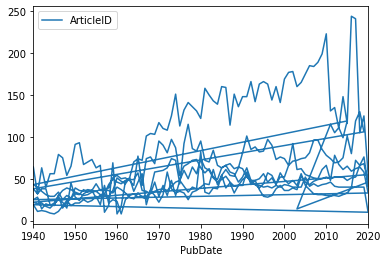

In [55]:


#print(df)
#df["journal"] = df.index
#df["journal"] = df.iloc[df.index.get_level_values('journal') == 1]

#df["journal"] 
# Make "new artice" metadata complete 
# Fuzzy merge slightly different variations of the same name
# Propoerly format this python code and notebook 
# Fix GitHuB
# Append to data

# Get rid of authors that are not already in dataset
#existing_authors = set(Author.AuthorName)
#new_authors = set(authors.metadata)
#new_authors = [x for x in new_authors if not x in existing_authors]
#new_authors = pd.DataFrame(new_authors)
#new_authors["AuthorID"] = range(0, len(new_authors))
#new_authors["AuthorID"] = new_authors["AuthorID"] + Author.AuthorID.max()
#new_authors.to_csv("new_authors.csv")

## Sanity Check
## TO DO: Break it down even further by issue and etc
# get rid of P&P
# Make sure every issue/volume matches up 
# Most 

In [514]:

# Action: add abstract 
# !!!: JEL CODES

In [449]:
# Import updated gender sex 
# filter byu female author, and then 
# make latex table of EARLIEST and MOST PROLIFIC in AGRGREGATE and BY JOURNAL
# make gender fractions
# Investigate dual vs solo coauthoring
# Write a failsafe checker for people who might be yellow
# Emma C llewelyn  checker 

In [2]:

os.chdir('/home/chris/HOPE/data/')
df = pd.read_csv("clean_data_3.csv")
df = df.drop(columns = ["Unnamed: 0"])

,metadata,idx,category
0,PT J,11725.0,PT
1,"AU WORSWICK, GDN",11725.0,AU
2,"AF WORSWICK, GDN",11725.0,AF
3,TI THE CONVEXITY OF THE PRODUCTION POSSIBILITY...,11725.0,TI
4,SO ECONOMIC JOURNAL,11725.0,SO
...,...,...,...
640236,GA 417GV,28913.0,GA
640237,UT WOS:000264065400013,28913.0,UT
640238,OA Green Accepted,28913.0,OA
640239,DA 2020-06-17,28913.0,DA


In [83]:
def scrape_journal(journal, start):
   
    time.sleep(10)

    driver = webdriver.Firefox()
    time.sleep(6) # lazy technical debt 
    driver.get('https://libguides.liverpool.ac.uk/az.php?a=w')
    time.sleep(6) 
    driver.find_element_by_xpath(u'/html/body/main/div/section/p[3]/a').click()
    time.sleep(6) 
    driver.find_element_by_id("logincaptchaform-username").send_keys("erin.hengel@gmail.com")
    driver.find_element_by_id("logincaptchaform-password").send_keys("wYlZYjf1e2")
    elem = driver.find_element_by_xpath('/html/body/main/div/section/form/div[2]/div/input')
    actions = ActionChains(driver)
    actions.click(elem).perform()

    time.sleep(10)


    data = pd.DataFrame([])
    string = journal # gross technical debt 
    string_length = len(string.split())
    root_start = start
     
    for i in tqdm_notebook(range(0,(2019-root_start))): # hardcoded (technical debt)
        
        
        if i > 0:
            driver.switch_to.window(driver.window_handles[0])
            start = start + 1

        
        if string_length ==  1:
            query = "so:" + str(journal) + " yearmin:"  + str(start) 
        else: 
            query = string.split()
            query = ["so:" + x  for x in query]
            query = ' '.join(query)
            query = query + " yearmin:"  + str(start) 
        print(query) 
        time.sleep(10) # Ugly workaround

        if i == 0:
            driver.find_element_by_link_text("Advanced").click()
        else:
            driver.find_element_by_link_text("Modify search").click()
    
        elem = driver.find_element_by_xpath('//*[@id="input-query"]').clear()
        elem = driver.find_element_by_xpath('//*[@id="input-source"]').clear()
        elem = driver.find_element_by_xpath('//*[@id="input-yearmin"]').clear()
        elem = driver.find_element_by_xpath('//*[@id="input-yearmax"]').clear()
        elem = driver.find_element_by_xpath('//*[@id="input-source"]').send_keys(journal)
        elem = driver.find_element_by_xpath('//*[@id="input-yearmin"]').send_keys(start)
        elem = driver.find_element_by_xpath('//*[@id="input-yearmax"]').send_keys(start)
        select = Select(driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/div/form/fieldset/table/tbody/tr[4]/td/select'))
        select.select_by_value('1000')
        elem = driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/div/form/fieldset/div/input').click()
        time.sleep(6)
        driver.find_element_by_xpath('//*[@id="sel-all-top"]').click()
        time.sleep(6)
        driver.find_element_by_xpath('//*[@id="select-all-link"]').click()
        time.sleep(6)
        driver.find_element_by_xpath('//*[@id="export-menu-button"]').click()
        time.sleep(6)
        driver.find_element_by_xpath('/html/body/div[2]/div/div[4]/div/div/div/div[2]/div[2]/div[2]/ul/li[3]/ul/li[5]/span').click()
        time.sleep(6)
        driver.switch_to.window(driver.window_handles[1])
        time.sleep(6)
        text= driver.find_element_by_xpath("html").text
        text = pd.DataFrame([x.split(';') for x in text.split('\n')])
        mask = text.applymap(lambda x: x is None)
        cols = text.columns[(mask).any()]
        for col in text[cols]:
            text.loc[mask[col], col] = ''
        cols = text.columns
        text['combined'] = text[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
        text = pd.DataFrame(text.combined)

        # Laziest/Ugliest workaround ever. Technical debt. 
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        text['combined'] = text['combined'].str.replace(',,',',')
        for l in tqdm_notebook(range(0, len(text))):
            string = text.iloc[l,0]
            string = string.rstrip(",")
            text.iloc[l,0] = string

        data = data.append(text)
    
    return(data)

In [ ]:
Quarterly_Journal_of_Economics = scrape_journal("Quarterly Journal of Economics", 1940)
Quarterly_Journal_of_Economics.to_csv("Quarterly_Journal_of_Economics.csv")

Journal_of_Political_Economy = scrape_journal("Journal of Political Economy", 1940)
Journal_of_Political_Economy.to_csv("Journal of Political Economy.csv")

Review_of_Economic_Studies = scrape_journal("Review of Economic Studies", 1940)
Review_of_Economic_Studies.to_csv("Review of Economic Studies.csv")

Econometrica = scrape_journal("Econometrica", 1940)
Econometrica.to_csv("Econometrica.csv")

American_Economic_Review = scrape_journal("American Economic Review", 1940)
American_Economic_Review.to_csv("American Economic Review.csv")

Review_of_Economics_and_Statistics = scrape_journal("Review of Economics and Statistics", 1940)
Review_of_Economics_and_Statistics.to_csv("Review of Economics and Statistics.csv")

Journal_of_Monetary_Economics  = scrape_journal("Journal of Monetary Economics", 1975)
Journal_of_Monetary_Economics.to_csv("Journal of Monetary Economics .csv")

Journal_of_Public_Economics  = scrape_journal("Journal of Public Economics", 1973)
Journal_of_Public_Economics.to_csv("Journal of Public Economics.csv")

Journal_of_Econometrics = scrape_journal("Journal of Econometrics", 1973)
Journal_of_Econometrics.to_csv("Journal of Econometrics.csv")

Journal_of_International_Economics  = scrape_journal("Journal of International Economics", ??)
Journal_of_International_Economics.to_csv("Journal of International Economics.csv")

Journal_of_Economic_Literature  = scrape_journal("Journal of Economic Literature", 1969)
Journal_of_Economic_Literature.to_csv("Journal of Economic Literature.csv")

Journal_of_Dev_Economics  = scrape_journal("Journal of Development Economics", 1974)
Journal_of_Dev_Economics.to_csv("Journal of Development Economics.csv")

Journal_of_Financial_Economics = scrape_journal("Journal of Financial Economics", 1974)
Journal_of_Financial_Economics.to_csv("Journal of Financial Economics.csv")

International_Economic_Review = scrape_journal("International Economic Review", 1960)
International_Economic_Review.to_csv("International Economic Review.csv")

,index,AuthorID,AuthorName,Sex,NativeLanguage,PhDYear,Note
0,0,1,A. Abigail Payne,Female,NaN,NaN,NaN
1,1,2,A. Andrew John,Male,English,NaN,NaN
2,2,3,A. Belloni,Male,NaN,NaN,NaN
3,3,4,A. Colin Cameron,Male,English,NaN,NaN
4,4,5,A. Joshua Strickland,Male,English,NaN,NaN
...,...,...,...,...,...,...,...
8205,8205,9615,Edward Tower,Male,NaN,NaN,NaN
8206,8206,9616,Andrew Feltenstein,Male,NaN,NaN,NaN
8207,8207,9617,Steven Braithwait,Male,NaN,NaN,NaN
8208,8208,9618,John S. Pettengill,Male,NaN,NaN,NaN


In [84]:
os.chdir('/home/chris/HOPE/')
df = pd.read_csv("top5.csv")
df = pd.DataFrame(df.iloc[:,-1])
df["title"] = ""
df.columns = ["metadata", "title"]
df = df[~df.metadata.str.contains("This record is part")]
df = df.iloc[-1000:-1,:]
for k in tqdm_notebook(range(0, len(df))):
    string = df.iloc[k,0]
    if string[:2] == "TI":
        string = str(string)
        df.iloc[k,-1] = string
df = df.replace(r'^\s*$', np.nan, regex=True)
df["title"] = df["title"].ffill()
df = df.dropna()

In [85]:
doi = df
doi['prefix'] = df['metadata'].astype(str).str[0:2]

In [90]:
doi= doi[doi["prefix"]== "DO"]

In [23]:
df.to_csv("test.csv")

In [29]:
import numpy as np

In [92]:
df

,metadata,title,prefix
480169,TI: Just Starting Out: Learning and Equilibriu...,TI: Just Starting Out: Learning and Equilibriu...,TI
480170,"AU: Doraszelski, Ulrich, Lewis, Gregory, Pakes...",TI: Just Starting Out: Learning and Equilibriu...,AU
480171,"AF: U PA, Microsoft Research New England, Harv...",TI: Just Starting Out: Learning and Equilibriu...,AF
480172,DO: http://dx.doi.org/10.1257/aer.20160177,TI: Just Starting Out: Learning and Equilibriu...,DO
480173,"SO: American Economic Review, 108(3), March 20...",TI: Just Starting Out: Learning and Equilibriu...,SO
...,...,...,...
481216,"KY: Asymmetric Information, Information, Litig...",TI: An Empirical Analysis of the Signaling and...,KY
481217,GD: U.S.,TI: An Empirical Analysis of the Signaling and...,GD
481218,GR: Northern America,TI: An Empirical Analysis of the Signaling and...,GR
481219,LA: English,TI: An Empirical Analysis of the Signaling and...,LA


In [ ]:
# The rise of Cauthoring 
# Network 

# Build edges and nodes 

